# **CONVOLUTION NEURAL NETWORK CLASSIFYING POKEMONS**

Dataset- https://www.kaggle.com/lantian773030/pokemonclassification

Since the dataset is not already divided into training and testing therefore model first try to divide the data into training and testins data.

In [ ]:
# Command used to split dataset into train and test folders
# two paths are provided here 1. folder to split 2. where to split 
import splitfolders
splitfolders.ratio('/content/drive/MyDrive/task(CNN)/PokemonData',output='/content/drive/MyDrive/task(CNN)/Pokemon Test Data',seed=1337,ratio=(0.8, 0.2))

In [ ]:
# importing all the necessary libraries
import glob
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization, Dense, Activation
from tensorflow.keras.models import load_model
from sklearn.metrics import plot_confusion_matrix
from keras import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Size of the image
size = 150

# Providing paths
train_path = '/content/drive/MyDrive/task(CNN)/PokemonSplittedData/train'
test_path = '/content/drive/MyDrive/task(CNN)/PokemonSplittedData/val'

# Generating compelete dataset
datagen = ImageDataGenerator(rescale=1./255)

#generation of training data as well as test data          
train_data = datagen.flow_from_directory(train_path, target_size=(size, size), batch_size=64, color_mode='rgb')
test_data = datagen.flow_from_directory(test_path, target_size=(size, size), batch_size=64,color_mode='rgb')

Found 5391 images belonging to 150 classes.
Found 1429 images belonging to 150 classes.


In [ ]:
# All the types of pokemons are listed here
d = train_data.class_indices
print(d)

{'Abra': 0, 'Aerodactyl': 1, 'Alakazam': 2, 'Alolan Sandslash': 3, 'Arbok': 4, 'Arcanine': 5, 'Articuno': 6, 'Beedrill': 7, 'Bellsprout': 8, 'Blastoise': 9, 'Bulbasaur': 10, 'Butterfree': 11, 'Caterpie': 12, 'Chansey': 13, 'Charizard': 14, 'Charmander': 15, 'Charmeleon': 16, 'Clefable': 17, 'Clefairy': 18, 'Cloyster': 19, 'Cubone': 20, 'Dewgong': 21, 'Diglett': 22, 'Ditto': 23, 'Dodrio': 24, 'Doduo': 25, 'Dragonair': 26, 'Dragonite': 27, 'Dratini': 28, 'Drowzee': 29, 'Dugtrio': 30, 'Eevee': 31, 'Ekans': 32, 'Electabuzz': 33, 'Electrode': 34, 'Exeggcute': 35, 'Exeggutor': 36, 'Farfetchd': 37, 'Fearow': 38, 'Flareon': 39, 'Gastly': 40, 'Gengar': 41, 'Geodude': 42, 'Gloom': 43, 'Golbat': 44, 'Goldeen': 45, 'Golduck': 46, 'Golem': 47, 'Graveler': 48, 'Grimer': 49, 'Growlithe': 50, 'Gyarados': 51, 'Haunter': 52, 'Hitmonchan': 53, 'Hitmonlee': 54, 'Horsea': 55, 'Hypno': 56, 'Ivysaur': 57, 'Jigglypuff': 58, 'Jolteon': 59, 'Jynx': 60, 'Kabuto': 61, 'Kabutops': 62, 'Kadabra': 63, 'Kakuna': 64, 

Ninetales


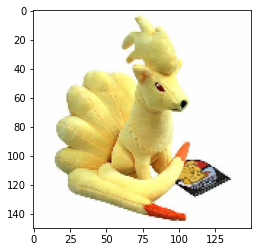

Vaporeon


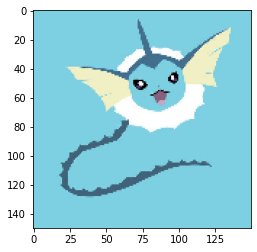

Wigglytuff


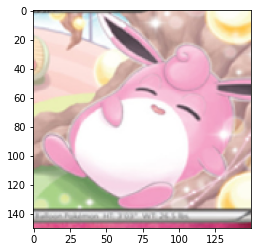

Hitmonlee


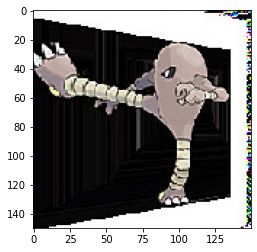

In [ ]:
# Showing some pokemons with their names
for i in range(4):
  val = list(train_data[0][1][i]).index(1)
  for key, value in d.items():
    if value == val:
      print(key)
  plt.imshow(train_data[0][0][i])
  plt.show()

## **Principal Component Analysis**

In [ ]:
# A method is defined to perform dimensional reduction
def _PCA(image):
  a = image.shape[0]
  b = image.shape[1]
  c = image.shape[2]
  image = image.reshape(a,-1)
  pca = PCA(70)
  fitted = pca.fit_transform(image)
  restoring = pca.inverse_transform(fitted)
  final = np.reshape(restoring,(a,b,c))
  ffinal = np.uint8(final)
  return ffinal

In [ ]:
# Applying PCA on training dataset
for iter in range(len(train_data)):
  for x in range(train_data[iter][0].shape[0]):
    train_data[iter][0][x] = _PCA(train_data[iter][0][x])

In [ ]:
# Applying PCA on test dataset
for iter in range(len(test_data)):
  for x in range(test_data[iter][0].shape[0]):
    test_data[iter][0][x] = _PCA(test_data[iter][0][x])

**Defining Neural Network**

In [ ]:
model = tf.keras.models.Sequential()

# Adding layers:
# Input layer
# Hidden layers
# Output layer

model.add(tf.keras.layers.Conv2D(64, padding='valid', kernel_size=(3,3), input_shape=(150,150,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(128, padding='valid', kernel_size=(3,3), kernel_regularizer =tf.keras.regularizers.l2( l=0.01), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(128,padding='valid', kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))



model.add(tf.keras.layers.Conv2D(256,padding='valid', kernel_size=(3,3), activation='relu'))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())


model.add(tf.keras.layers.Conv2D(1024,padding='valid', kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.2))

#flattening output of convolutional layers
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(2098, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(512, activation='relu'))

#output layer
model.add(tf.keras.layers.Dense(150, activation='softmax'))


#setting up an optimizer with a learning rate of 0.001
opt = Adam(0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])


Summarizing the whole network

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 36, 36, 128)       0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 36, 36, 128)       0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 36, 36, 128)       512       
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 34, 34, 128)     

In [ ]:
#training our model
history = model.fit(train_data,validation_data=test_data, epochs=25, verbose=1)

Epoch 1/25
85/85 [==============================] - 45s 525ms/step - loss: 6.2144 - acc: 0.0194 - val_loss: 5.7212 - val_acc: 0.0105
Epoch 2/25
85/85 [==============================] - 44s 519ms/step - loss: 4.1101 - acc: 0.0928 - val_loss: 5.6047 - val_acc: 0.0182
Epoch 3/25
85/85 [==============================] - 45s 527ms/step - loss: 3.3090 - acc: 0.1870 - val_loss: 7.1518 - val_acc: 0.0126
Epoch 4/25
85/85 [==============================] - 44s 519ms/step - loss: 2.7257 - acc: 0.2987 - val_loss: 5.0530 - val_acc: 0.0812
Epoch 5/25
85/85 [==============================] - 44s 520ms/step - loss: 2.2817 - acc: 0.3938 - val_loss: 3.6607 - val_acc: 0.2155
Epoch 6/25
85/85 [==============================] - 44s 519ms/step - loss: 1.9249 - acc: 0.4854 - val_loss: 2.5325 - val_acc: 0.3667
Epoch 7/25
85/85 [==============================] - 44s 512ms/step - loss: 1.5433 - acc: 0.5781 - val_loss: 2.2374 - val_acc: 0.4472
Epoch 8/25
85/85 [==============================] - 44s 520ms/step - 

In [ ]:
# Saving the weights of CNN model
model.save_weights('/content/drive/MyDrive/task(CNN)/cnn_model.h5')

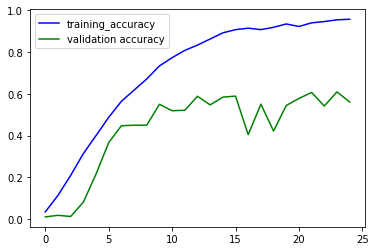

In [ ]:
# Plotting Accuracy curve
import matplotlib.pyplot as plt
plt.plot(history.history['acc'], 'b', label='training_accuracy')
plt.plot(history.history['val_acc'], 'g', label='validation accuracy')
plt.legend()
plt.show()

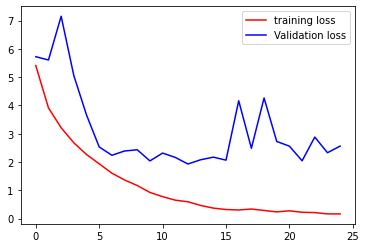

In [ ]:
# Plotting the loss curve
plt.plot(history.history['loss'], 'r', label='training loss')
plt.plot(history.history['val_loss'], 'b', label='Validation loss')
plt.legend()
plt.show()

# **TESTING** **PHASE**

In [ ]:
model.predict_classes(img_pred)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([84])

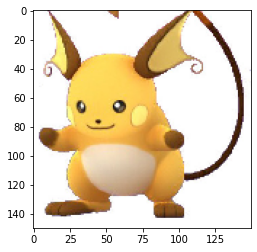

Raichu


In [ ]:
# Selecting a particular image to check the result
from keras.preprocessing import image
import numpy as np

img_pred = image.load_img('/content/drive/MyDrive/task(CNN)/PokemonData/Raichu/032fea5a87cf480181352d2319a34966.jpg',target_size=(150,150))
plt.imshow(img_pred)
plt.show()
img_pred = np.expand_dims(img_pred,axis = 0)
img_pred = img_pred/255
class_ = np.argmax(model.predict(img_pred),axis=-1)
class_out = {value:key for key,value in train_data.class_indices.items()}
print(class_out[class_[0]])


And here prediction is Correct!